# Data Analysis

### Import necessary libraries

In [21]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

### Merging twelve months of sales_data into a single .csv file

In [9]:
df = pd.concat(
    map(pd.read_csv, ['Sales_Data/Sales_January_2019.csv',
                      'Sales_Data/Sales_February_2019.csv',
                      'Sales_Data/Sales_March_2019.csv',
                      'Sales_Data/Sales_April_2019.csv',
                      'Sales_Data/Sales_May_2019.csv',
                      'Sales_Data/Sales_June_2019.csv',
                      'Sales_Data/Sales_July_2019.csv',
                      'Sales_Data/Sales_August_2019.csv',
                      'Sales_Data/Sales_September_2019.csv',
                      'Sales_Data/Sales_October_2019.csv',
                      'Sales_Data/Sales_November_2019.csv',
                      'Sales_Data/Sales_December_2019.csv']), ignore_index=True)

df.to_csv('all_data.csv', index=False)

In [12]:
df_all_data = pd.read_csv('./all_data.csv')

In [13]:
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Data Cleaning

In [15]:
df_all_data = df_all_data.dropna()

In [19]:
df_all_data = df_all_data[df_all_data['Order Date'].str[0:2] != 'Or']

### Augment data with additional columns

### Add month column

In [22]:
df_all_data['Month'] = df_all_data['Order Date'].str[0:2]
df_all_data['Month'] = df_all_data['Month'].astype('int32')
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Add sales column

In [25]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 6.4+ MB


In [28]:
df_all_data['Quantity Ordered'] = df_all_data['Quantity Ordered'].astype(float)
df_all_data['Price Each'] = df_all_data['Price Each'].astype(float)

In [31]:
df_all_data['Sales'] = df_all_data['Quantity Ordered'] * df_all_data['Price Each']
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [34]:
column_to_move1 = df_all_data.pop("Month")
df_all_data.insert(5, "Month", column_to_move1)

column_to_move2 = df_all_data.pop("Sales")
df_all_data.insert(4, "Sales", column_to_move2)

df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,141234,iPhone,1.0,700.00,700.00,01/22/19 21:25,1,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,14.95,01/28/19 14:15,1,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,23.98,01/17/19 13:33,1,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,149.99,01/05/19 20:33,1,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,11.99,01/25/19 11:59,1,"387 10th St, Austin, TX 73301"


#### Question 1 : What was the best month for sales? How much was earned that month?

In [46]:
results = df_all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88
9,13109.0,2084992.09,2097560.13


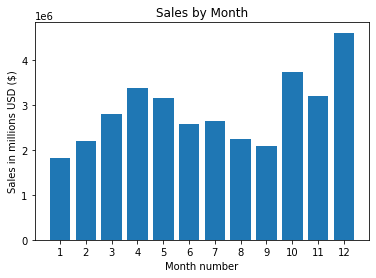

In [44]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in millions USD ($)')
plt.xlabel('Month number')
plt.title('Sales by Month')
plt.show()

#### December has the biggest sales record where 4613443.34$ were earned.

#### Question 2 : What city had the highest number of sales?

### Add a city column

In [68]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


df_all_data['City'] = df_all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,141234,iPhone,1.0,700.00,700.00,01/22/19 21:25,1,"944 Walnut St, Boston, MA 02215",Boston (MA)
1,141235,Lightning Charging Cable,1.0,14.95,14.95,01/28/19 14:15,1,"185 Maple St, Portland, OR 97035",Portland (OR)
2,141236,Wired Headphones,2.0,11.99,23.98,01/17/19 13:33,1,"538 Adams St, San Francisco, CA 94016",San Francisco (CA)
3,141237,27in FHD Monitor,1.0,149.99,149.99,01/05/19 20:33,1,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA)
4,141238,Wired Headphones,1.0,11.99,11.99,01/25/19 11:59,1,"387 10th St, Austin, TX 73301",Austin (TX)


In [69]:
results1 = df_all_data.groupby('City').sum()
results1

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602.0,2779908.20,2795498.58,104794
Austin (TX),11153.0,1809873.61,1819581.75,69829
Boston (MA),22528.0,3637409.77,3661642.01,141112
Dallas (TX),16730.0,2752627.82,2767975.40,104620
Los Angeles (CA),33289.0,5421435.23,5452570.80,208325
New York City (NY),27932.0,4635370.83,4664317.43,175741
Portland (ME),2750.0,447189.25,449758.27,17144
Portland (OR),11303.0,1860558.22,1870732.34,70621
San Francisco (CA),50239.0,8211461.74,8262203.91,315520


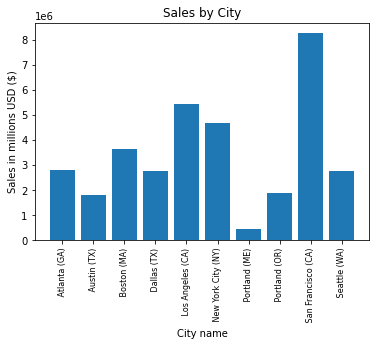

In [72]:

cities = [city for city, df in df_all_data.groupby('City')]

plt.bar(cities, results1['Sales'])
plt.xticks(cities, rotation = "vertical", size=8 )
plt.ylabel('Sales in millions USD ($)')
plt.xlabel('City name')
plt.title('Sales by City')
plt.show()

#### San Francisco has the best results in terms of sales

### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying product?

In [74]:
df_all_data['Order Date'] = pd.to_datetime(df_all_data['Order Date'])

In [78]:
df_all_data['Hour'] = df_all_data['Order Date'].dt.hour
df_all_data['Minute'] = df_all_data['Order Date'].dt.minute
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,141234,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215",Boston (MA),21,25
1,141235,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035",Portland (OR),14,15
2,141236,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016",San Francisco (CA),13,33
3,141237,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA),20,33
4,141238,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301",Austin (TX),11,59


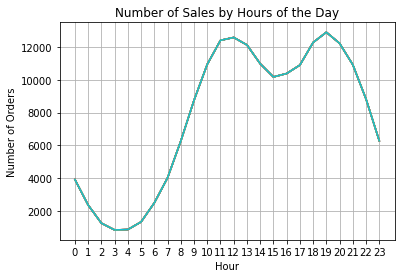

In [86]:
hours = [hour for hour, df in df_all_data.groupby('Hour')]

plt.plot(hours, df_all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.title('Number of Sales by Hours of the Day')
plt.show()

### Question 4: What products are most often sold together?

In [92]:
df = df_all_data[df_all_data['Order ID'].duplicated(keep=False)]

df['Products Bought At The Same Time'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Products Bought At The Same Time']].drop_duplicates()

df.head()

,Order ID,Products Bought At The Same Time
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [96]:
from itertools import combinations
from collections import Counter

count = Counter()


for row in df['Products Bought At The Same Time']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### iPhone and Lightning Charging Cable are the two items that are the most sold together

### Question 5: What product sold the most? Why do you think it sold the most?

In [98]:
df_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,141234,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215",Boston (MA),21,25
1,141235,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035",Portland (OR),14,15
2,141236,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016",San Francisco (CA),13,33
3,141237,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA),20,33
4,141238,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301",Austin (TX),11,59


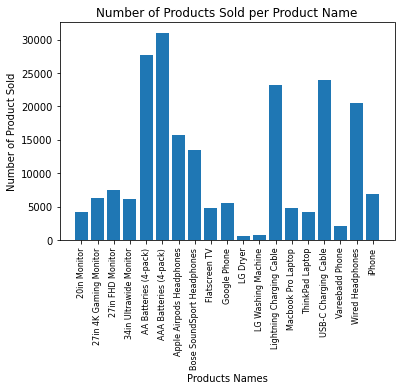

In [110]:
product_group = df_all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Products Names')
plt.ylabel('Number of Product Sold')
plt.title('Number of Products Sold per Product Name');

In [ ]:
#### The product that sold the most is AAA Batteries(4-pack), followed by AA Batteries (4_pack). 

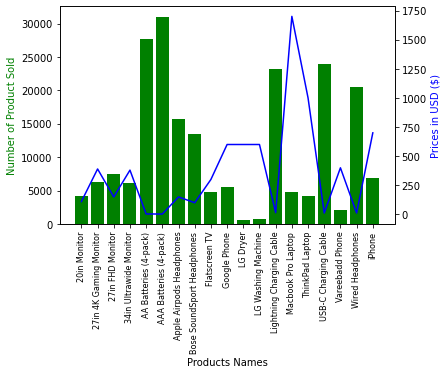

In [122]:
prices = df_all_data.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products Names')
ax1.set_ylabel('Number of Product Sold', color='g')
ax2.set_ylabel('Prices in USD ($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()
